# Машинное обучение, DS-поток
## Задание ML.5


Комментарии к решению.

Задача 1: Эквивалентность задач оптимизации.
▫️ Наличие решения. (10.0)
Баллы: 10.0 / 10.0

Задача 2: Задача поиска новой базовой модели.
▫️ Наличие решения. (10.0)
Баллы: 10.0 / 10.0

Задача 3: Веса объектов для логистической функции потерь.
▫️ Пункт 1: наличие решения. (10.0)
▫️ Пункт 2: наличие решения. (10.0)
▫️ Пункт 3: наличие решения. (10.0)
▫️ В пункте 1 недостаточное объянение. Комм. Стоило расписать y_t через y_{t-1} и b_t и разбить экспоненту на две, иначе непонятно что вообще считать вкладом и что тут обучается. Если так сделать, то получается, что в зависимости от правильности и уверенности предыдущего предсказания y_{t-1} мы берем экспоненту, соответствующую b_t, с разным весом, то есть это и будет неким вкладом в ошибку. (-7.0)
▫️ В пункте 3 не показано, что вес объекта ограничен в случае логистической функции в отличие от экспоненциальной. (-5.0)
Баллы: 18.0 / 30.0

Задача 4: Градиентный бустинг над решающими деревьями.
▫️ Наличие решения. Инд. комм. Нет решения(
Баллы: 0.0 / 10.0

Задача 5: Исследование градиентного бустинга и сравнение со случайным лесом.
▫️ Пункт 1: наличие решения. (30.0)
▫️ Пункт 2: наличие решения. (15.0)
▫️ Пункт 3: наличие решения. (15.0)
▫️ Пункт 4: наличие решения. (15.0)
▫️ Пункт 1. Нет объяснений (или они некорректные) результатов трех запусков моделей с параметрами по умолчанию. Комм. Случайность возникает из-за случайного порядка перебора признаков при разбиении вершины: если есть два признака, которые дают одинаковое оптимальное значение критерия информативности, то из них выбирается тот, что первым перебирается. (-3.0)
▫️ Пункт 1. Нет выводов и объяснений по проведенному исследованию. (0.0)
▫️ Пункт 1. Нет объяснения, в чем смысл параметра lr. (-3.0)
▫️ Пункт 4. Нет стандартизации. Комм. Перед подачей данных в ridge-регрессию надо проводить стандартизацию. (-5.0)
▫️ Пункт 4. Нет ответа про начальную модель по умолчанию или он неправильный. Комм. Берется среднее для MSE и медиана в остальных случаях. (-3.0)
▫️ Графики трудно сравнивать между собой. Комм. Нужно или выводить на одном графике, или зафиксировать исследуемую ось. (-5.0)
Баллы: 56.0 / 90.0

Сумма: 94.0 / 150.0

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 10 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 90 баллов.

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

from tqdm import tqdm
from time import time

In [1]:
import base64
from IPython.display import HTML

---
## Теория

Рассмотрим задачу бинарной классификации, причем $\mathscr{Y} = \{+1, -1\}$. Пусть так же $\widehat{y}$ &mdash; некоторый классификатор, предсказывающий <u><i>степень принадлежности</i></u> классу. При этом решающее правило имеет вид 
 $f(x) = \text{sign}\left(\widehat{y}(x)\right)$.
В задачах 1-4 рассматриваем логистическую функцию потерь:
$$\mathcal{L}(y, z) = \log \big(1 + \exp(-yz) \big).$$

### Задача 1

Покажите, что задача минимизации по функциям $y(x)$ функционала ошибки $$Q(y) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, y(x_i)\right) \longrightarrow \min_{y(x)}$$ для логистической функции потерь эквивалентна максимизации по $y(x)$ функции правдоподобия в предположении $Y_i \sim Bern(\sigma(y(x_i)))$, где $Y_i \in \{-1, +1 \}$.


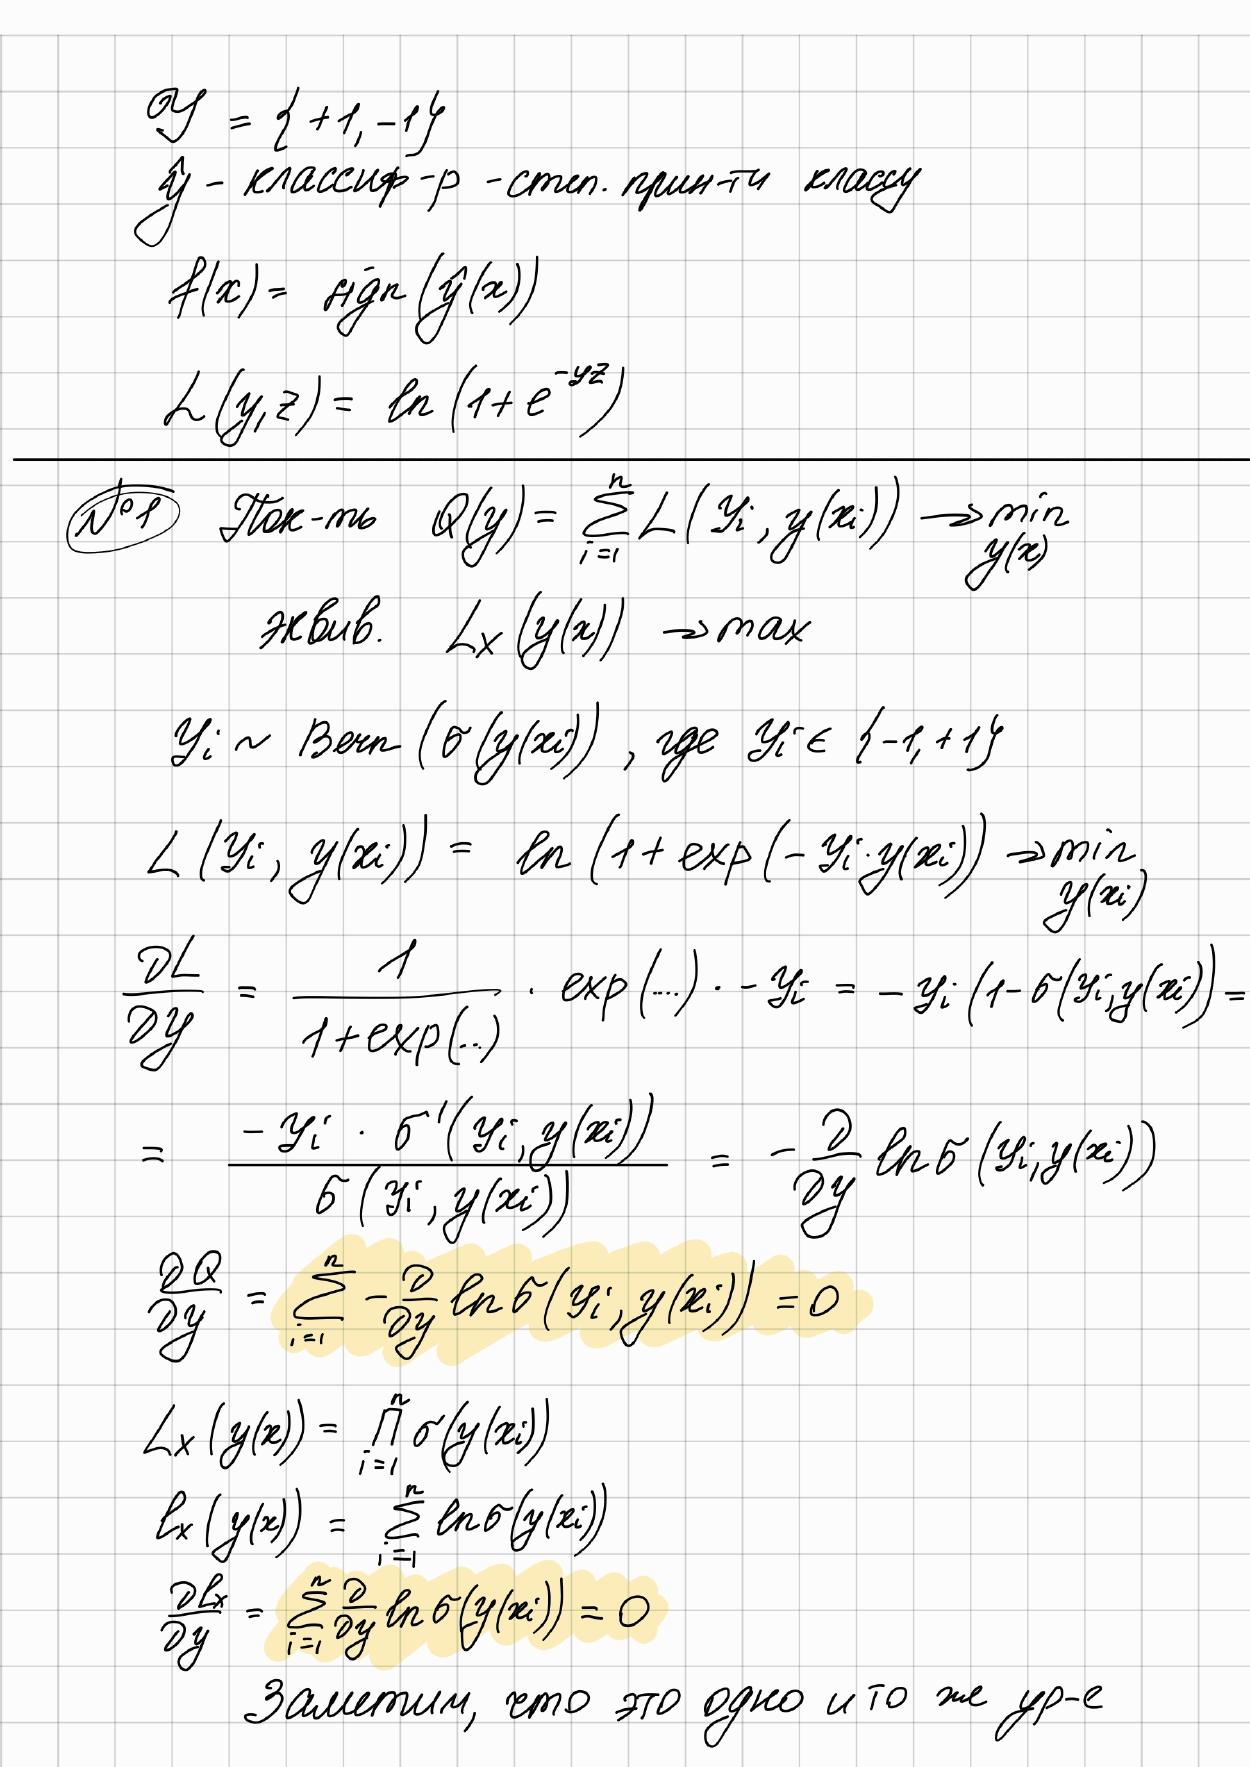

In [2]:
with open("теория/ML5_page-0001.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

html_code = f'<img src="data:image/jpeg;base64,{encoded_string}" alt="Embedded Image" width="600">'
HTML(html_code)

### Задача 2

Рассмотрим градиентный бустинг с логистической функцией потерь. Выпишите для градиентного спуска формулу для вектора сдвигов предсказаний и задачу поиска новой базовой модели по их приближению. 

### Задача 3

Предположим, модель градиентного бустинга $\widehat{y}_{t - 1}$ уже построена.
1. Выпишите вид функционала ошибки $Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right)$ для логистической функции потерь. Одинаковый ли вклад вносят разные объекты в ошибку при построении новой базовой модели $b_t$?
2. Посмотрите на формулу для вектора сдвигов, полученную в предыдущей задаче. Как она выражается через отклики на объектах обучающей выборки? Одинаковый ли вклад вносят разные объекты в формирование вектора сдвигов при построении новой базовой модели $b_t$?
3.  На лекции было показано, что для экспоненциальной функции есть проблема: базовый классификатор может настраиваться только на шумовые объекты. Наблюдается ли такая проблема у логистической функции потерь? Как она ведет себя на объектах с сильно отрицательным, околонулевым, сильно положительным отсупами?


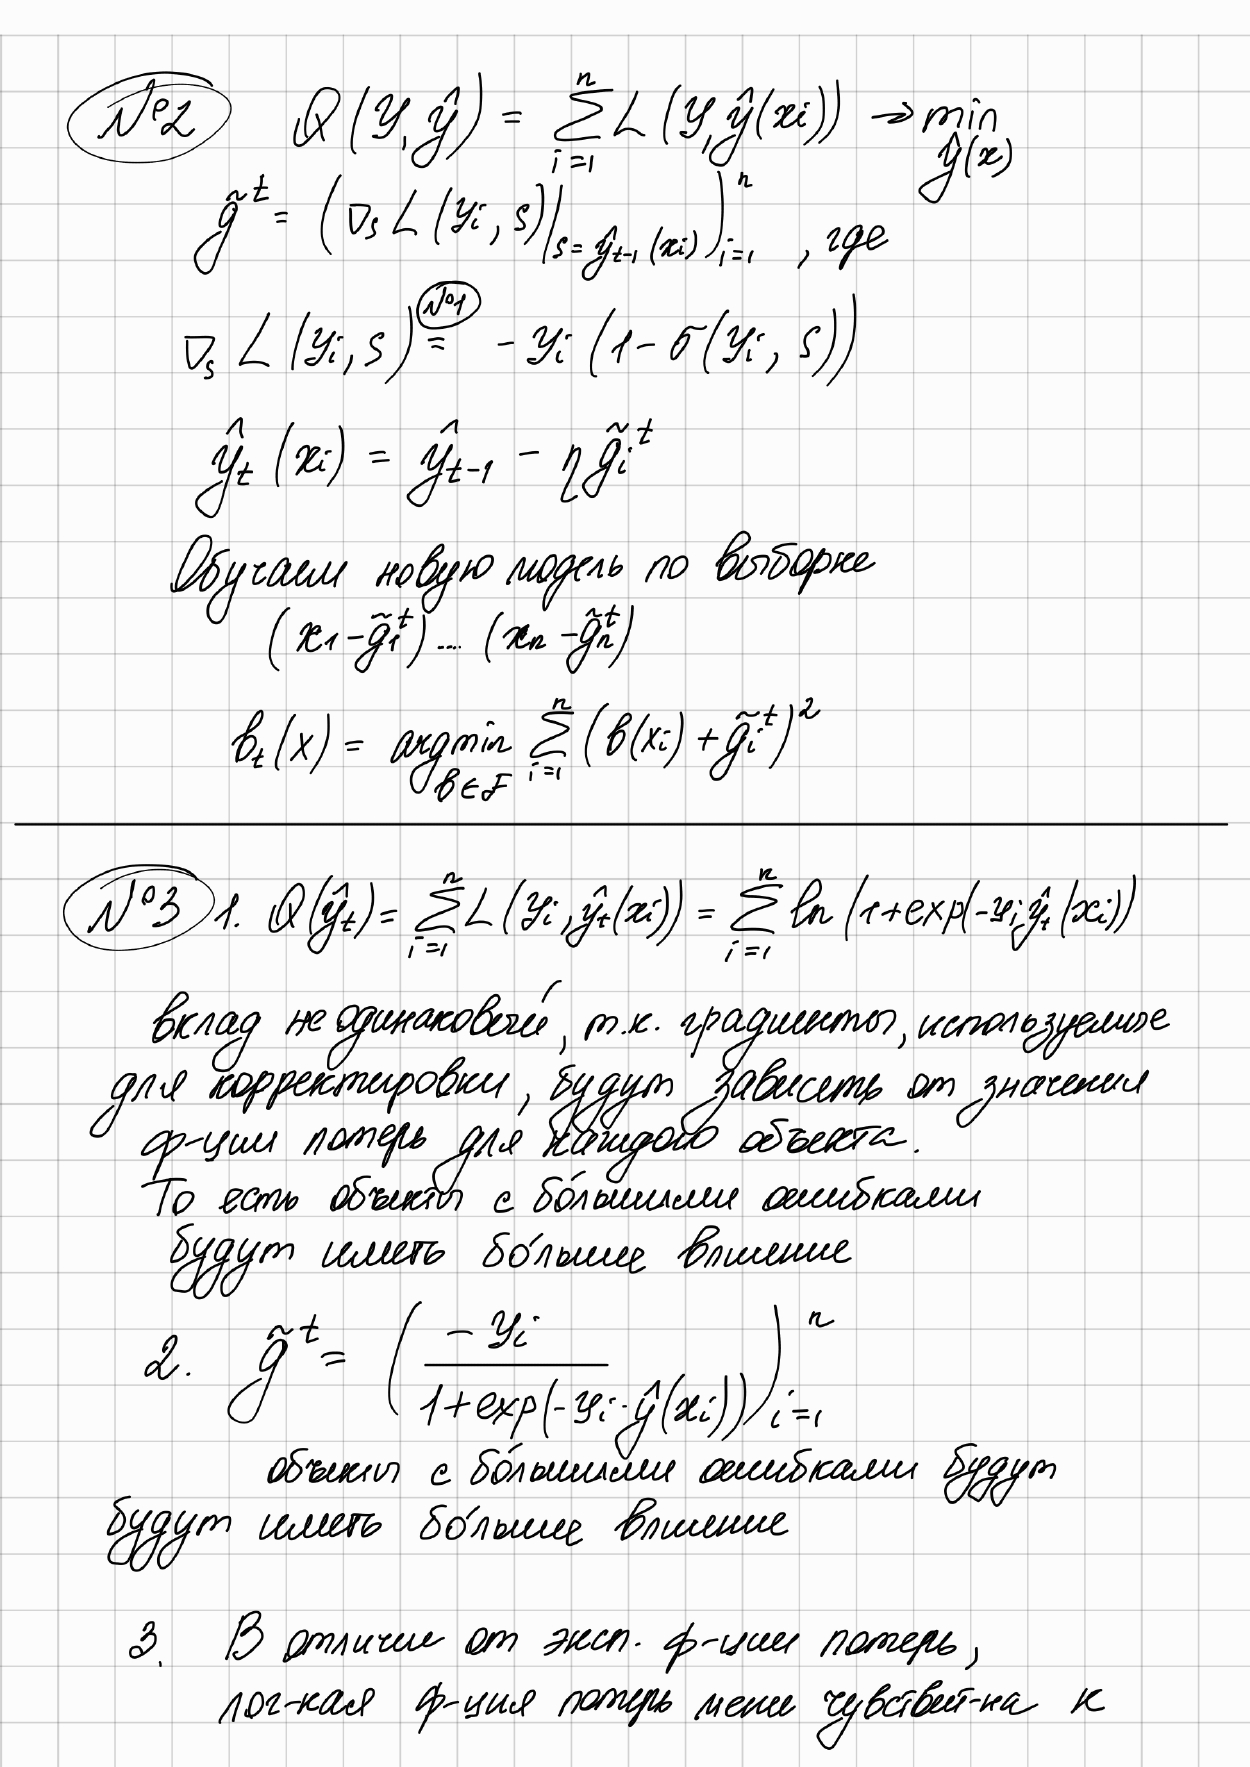

In [4]:
with open("теория/ML5_page-0002.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

html_code = f'<img src="data:image/jpeg;base64,{encoded_string}" alt="Embedded Image" width="600">'
HTML(html_code)


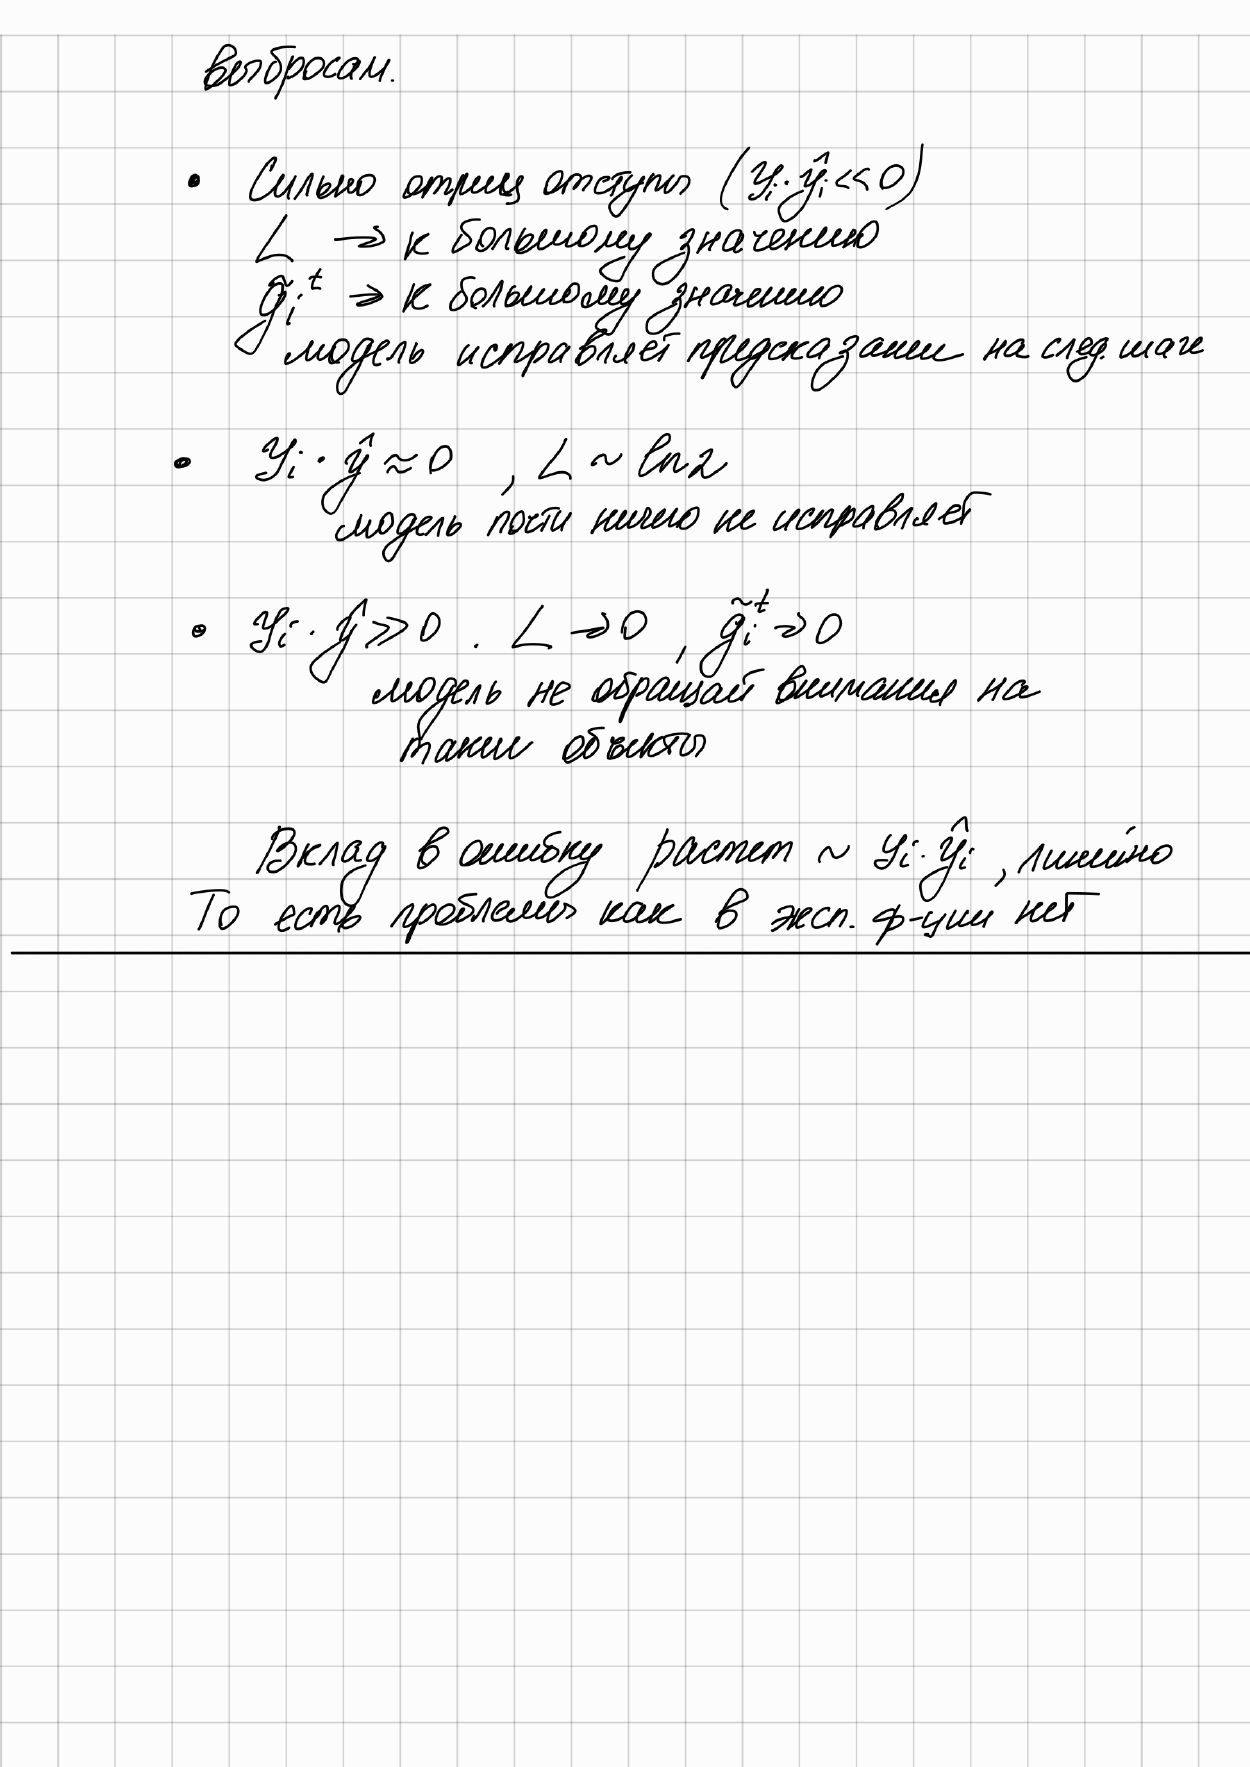

In [6]:
with open("теория/ML5_page-0003.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

html_code = f'<img src="data:image/jpeg;base64,{encoded_string}" alt="Embedded Image" width="600">'
HTML(html_code)

### Задача 4

Рассмотрим градиентный бустинг над решающими деревьями с логистической функции потерь. После построения дерева будем делать перенастройку в листьях дерева.
1. Выпишите оптимизационную задачу для коэффициентов $\gamma_{tj}$ &mdash; новых ответов в листьях.
2. Решите полученную задачу сделав один шаг метода Ньютона из начального приближения $\gamma_{tj} = 0$, что соответствует отсутствию базовой модели $b_t$.


---
## Практика

### Задача 5

**Внимание!** 

Перед выполнением задачи прочитайте полностью условие. В задаче используются смеси различных моделей с разными гиперпараметрами. Подумайте над тем, какой гиперпараметр как подбирать и на каком множестве. Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

**Не забывайте делать выводы в каждом пункте!**

#### 1.

Повторите исследование, проведенное в задаче 2 задания ML.4, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом. 

Вкратце опишем задания:
1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
    * количество деревьев (`n_estimators`) [от 1 до 400];
    * максимальная глубина дерева (`max_depth`) [от 1 до 15];
    * скорость обучения (`learning_rate`), поясните также смысл этого параметра.
2. Запустите модель три раза с параметрами по-умолчанию. Объясните результаты.
3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.
4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.

*Замечания.*
* В качестве основы можно использовать как свое решение задания ML.4, так и выложенное на [сайте](https://thetahat.ru). В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t$.
* При желании, границы рассмотрения значений гиперпараметров можно увеличить.
* При подборе гиперпараметров при помощи рандомизированного поиска проводите достаточное количество итераций на большой сетке параметров &mdash; как минимум 50. Даже если долго обучается.

In [4]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Посмотрим, как меняется качество модели в зависимости от количества деревьев (`n_estimators`)

In [5]:
rf = RandomForestRegressor(n_estimators=400)
gb = GradientBoostingRegressor(n_estimators=400)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

mses_rf = []
for n_est in range(1, 401):
    res = []
    for i in range(n_est):
        preds = rf.estimators_[i].predict(X_test)
        res.append(preds)
    preds = np.array(res).mean(axis=0)
    mses_rf.append(mean_squared_error(y_test, preds))

In [6]:
preds_gb = [x for x in gb.staged_predict(X_test)]
mses_gb = [mean_squared_error(y_test, x) for x in preds_gb]

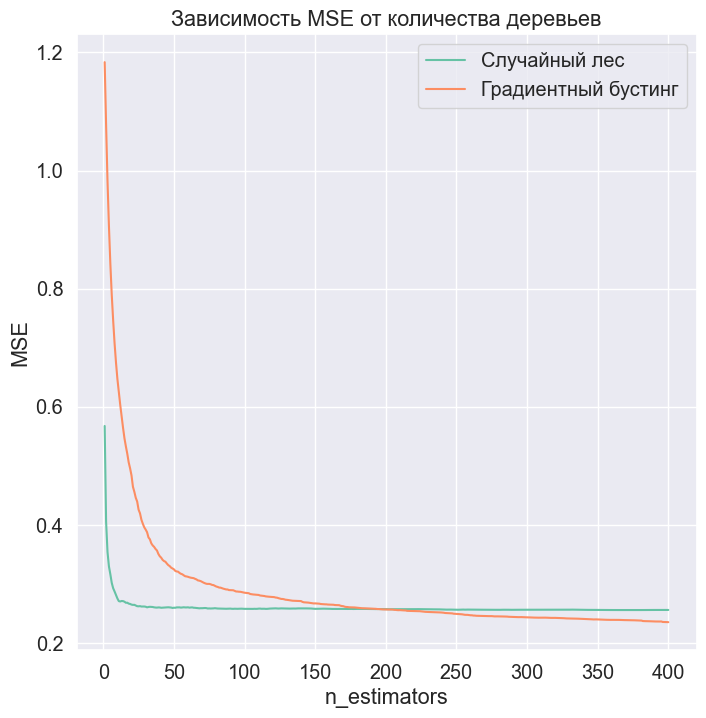

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(np.arange(1, 401), mses_rf, label='Случайный лес')
plt.plot(np.arange(1, 401), mses_gb, label='Градиентный бустинг')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества деревьев')
plt.legend()
plt.show()

При увеличении количества деревьев у случайного леса ошибка перестает меняться уже после 30 деревьев. Градиентный бустинг же в начале убывает медленне, но при этом продолжает убывать с увеличением количества деревьев

Посмотрим, как меняется качество модели в зависимости от максимальная глубина дерева (`max_depth`)

In [8]:
rfs = []
gbs = []

for depth in range(1, 16):
    rf = RandomForestRegressor(max_depth=depth)
    gb = GradientBoostingRegressor(max_depth=depth)
    rf.fit(X_train, y_train)
    gb.fit(X_train, y_train)
    rfs.append(rf)
    gbs.append(gb)

In [9]:
mses_rf = []
mses_gb = []

for i in range(15):
    pred_rf = rfs[i].predict(X_test)
    pred_gb = gbs[i].predict(X_test)
    mses_rf.append(mean_squared_error(y_test, pred_rf))
    mses_gb.append(mean_squared_error(y_test, pred_gb))

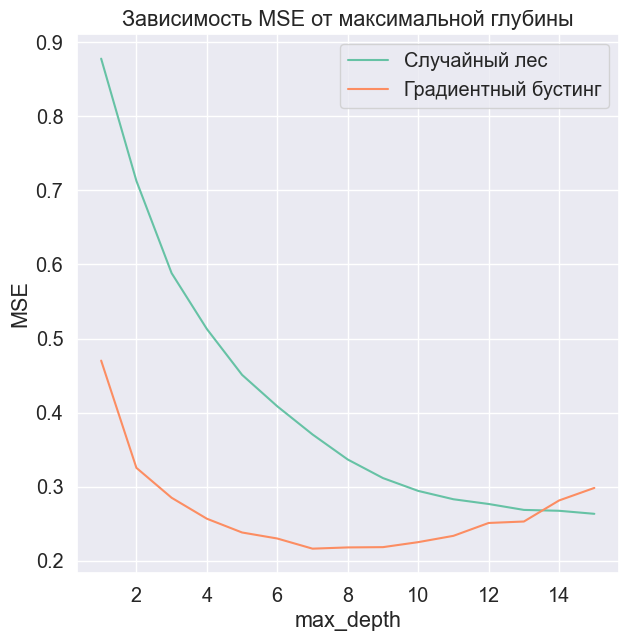

In [10]:
plt.figure(figsize=(7, 7))
plt.plot(np.arange(1, 16), mses_rf, label='Случайный лес')
plt.plot(np.arange(1, 16), mses_gb, label='Градиентный бустинг')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Зависимость MSE от максимальной глубины')
plt.legend()
plt.show()

В градиентном бустинге ошибка достигает минимума при глубине дерева = 7. Случайный лес монотонно убывает монотонно.

Посмотрим, как меняется качество модели в зависимости от скорость обучения (`learning_rate`). 
На этот коэффициент мы домножаем градиент, то есть насколько сильно мы корректируем модель по сравнению с предыдущими. Это коэффициент доверия очередной модели.

In [17]:
gbs = []
for lr in np.linspace(0.01, 1, 30):
    gb = GradientBoostingRegressor(learning_rate=lr)
    gb.fit(X_train, y_train)
    gbs.append(gb)

In [24]:
mses_gb = []

for i in range(30):
    pred_gb = gbs[i].predict(X_test)
    mses_gb.append(mean_squared_error(y_test, pred_gb))

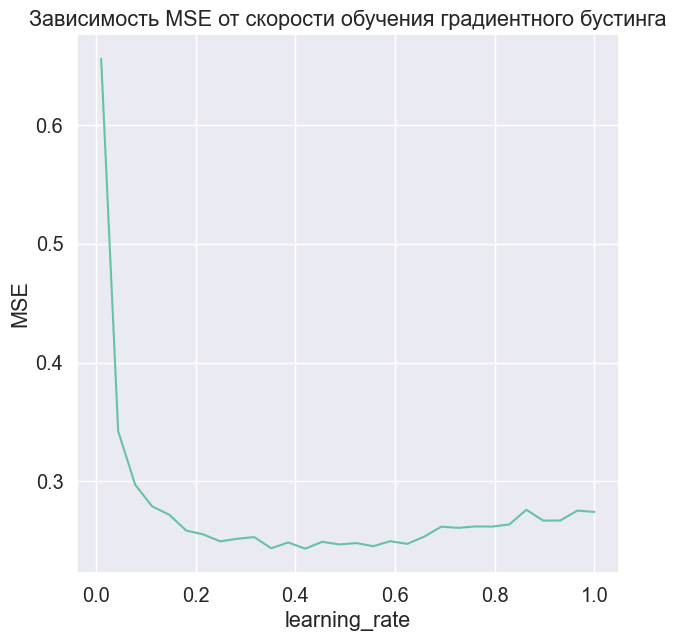

In [25]:
plt.figure(figsize=(7, 7))
plt.plot(np.linspace(0.01, 1, 30), mses_gb)
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.title('Зависимость MSE от скорости обучения градиентного бустинга')
plt.show()

Минимум достигается в окрестности 0.4

Запустим модель три раза с дефолтными параметрами

In [26]:
for i in range(3):
    gb = GradientBoostingRegressor()
    gb.fit(X_train, y_train)
    pred = gb.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f'{i+1}-й запуск, MSE={mse:.5f}')

1-й запуск, MSE=0.28507
2-й запуск, MSE=0.28502
3-й запуск, MSE=0.28525


Результаты слегка отличаются, потому что что-то в модели выбирается случайно

Найдем оптимальные параметры

In [27]:
rf_gs = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions= {
        'max_depth': np.arange(1, 15),
        'n_estimators': np.arange(25, 425, 25),
        'learning_rate': np.linspace(0.01, 1, 30)
    },
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    n_iter=50
)

rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ]),
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400])},
                   scoring='neg_mean_squared_error', verbose=1)

In [28]:
rf_gs.best_params_

{'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.04413793103448276}

In [30]:
optimal_n_estimators = rf_gs.best_params_['n_estimators']
optimal_max_depth = rf_gs.best_params_['max_depth']
optimal_learning_rate = rf_gs.best_params_['learning_rate']

In [32]:
gb = GradientBoostingRegressor(n_estimators=optimal_n_estimators,
                                max_depth=optimal_max_depth,
                                learning_rate=optimal_learning_rate)
gb.fit(X_train, y_train)
pred = gb.predict(X_test)
mean_squared_error(y_test, pred)

0.21018793872081826

Исследуем зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.

In [35]:
n_features = X_train.shape[1]

max_features_range = np.arange(1, n_features + 1)

mses1 = []

for max_features in max_features_range:
    gb1 = GradientBoostingRegressor(
        n_estimators=optimal_n_estimators,
        max_depth=optimal_max_depth,
        learning_rate=optimal_learning_rate,
        max_features=max_features,
        random_state=42
    )
    
    gb1.fit(X_train, y_train)
    
    pred = gb1.predict(X_test)
    
    mse = mean_squared_error(y_test, pred)
    mses1.append(mse)

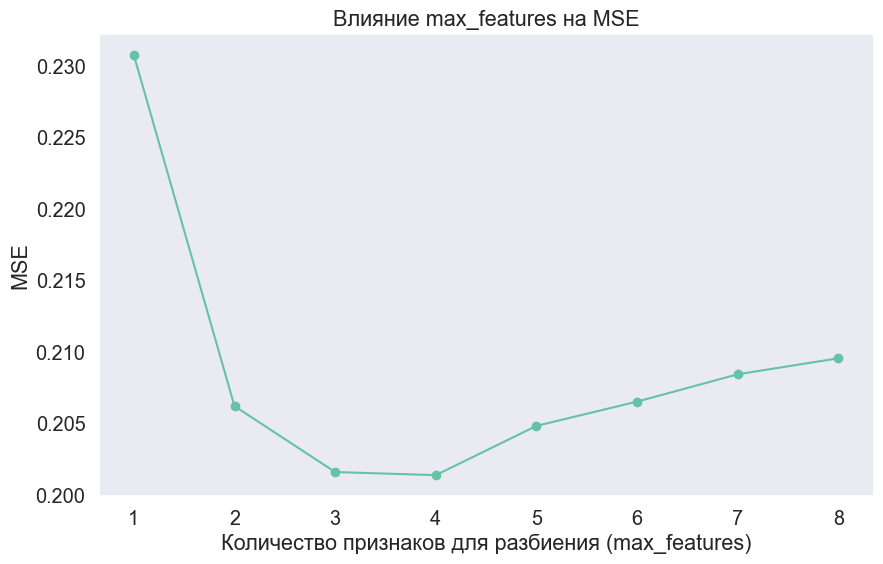

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, mses1, marker='o')
plt.title('Влияние max_features на MSE')
plt.xlabel('Количество признаков для разбиения (max_features)')
plt.ylabel('MSE')
plt.grid()
plt.show()

Увеличение max_features сначала улучшает качество модели, но после значения 4 ошибка начинает расти. При слишком малом значении max_features деревья могут недостаточно полно использовать информацию, что приводит к увеличению ошибки. С другой стороны, при большем значении модель использует больше признаков, что может привести к переобучению.

**2.**

Проведите сравнение случайного леса и градиентного бустинга с оптимальными гиперпараметрами, подобранными ранее, по производительности, в рамках которого выполните следующие действия.
* Замерьте время обучения данных моделей.
* Замерьте время построения предсказания для каждого объекта тестовой выборки. Постройте гистограмму, посчитайте среднее время и предсказательный интервал (возьмите выборочные квантили).
* Сравните фактическую глубину деревьев и количество листьев в композициях с помощью гистограмм. Посчитайте также среднее значение указанных характеристик. Используйте методы `get_depth()` и `get_n_leaves()` у решающего дерева.

In [38]:
gb = GradientBoostingRegressor(n_estimators=optimal_n_estimators, 
                               max_depth=optimal_max_depth, 
                               learning_rate=optimal_learning_rate)
rf = RandomForestRegressor(n_estimators=20, max_depth=60, n_jobs=-1)

In [39]:
%timeit gb.fit(X_train, y_train)

29.4 s ± 742 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit rf.fit(X_train, y_train)

667 ms ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


GradientBoostingRegressor обучается намного дольше, чем RandomForestRegressor. Это связано с возможностью распараллеливания построения деревьев, а в бустинге мы последовательно обучаем модели.

In [41]:
gb.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, n_estimators=20, n_jobs=-1)

In [42]:
gb_predict_times = []
rf_predict_times = []

In [43]:
for xi in X_test:
    start = time()
    gb.predict(xi[None, :])
    stop = time()
    gb_predict_times.append(stop - start)

    start = time()
    rf.predict(xi[None, :])
    stop = time()
    rf_predict_times.append(stop - start)

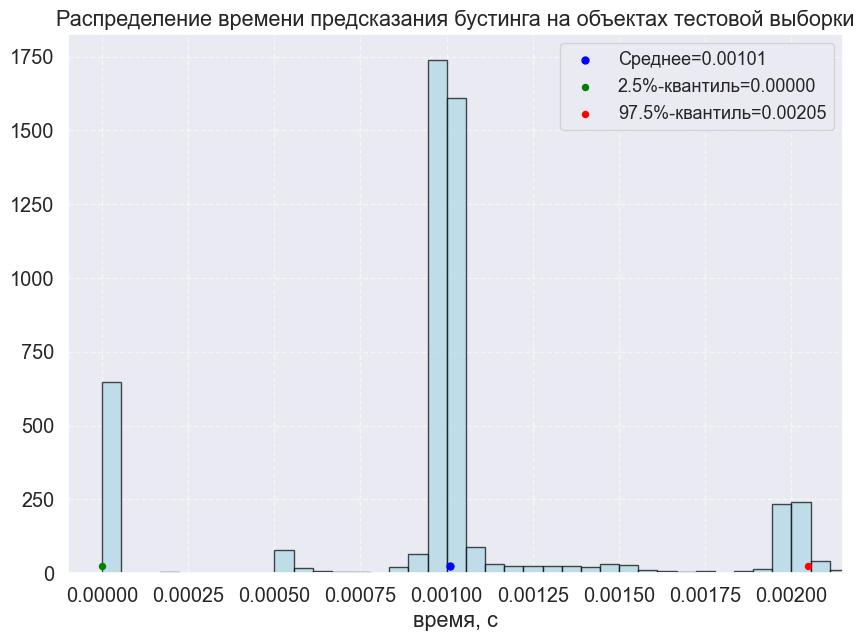

In [66]:
plt.figure(figsize=(10, 7))
plt.hist(gb_predict_times, bins=60, color='lightblue', edgecolor='black', alpha=0.7)

mean = np.array(gb_predict_times).mean()
left = np.quantile(np.array(gb_predict_times), 0.025)
right = np.quantile(np.array(gb_predict_times), 0.975)

plt.scatter(mean, 25, marker='.', s=100, color='blue', label=f'Среднее={mean:.5f}')
plt.scatter(left, 25, marker='.', s=75, color='green', label=f'2.5%-квантиль={left:.5f}')
plt.scatter(right, 25, marker='.', s=75, color='red', label=f'97.5%-квантиль={right:.5f}')

plt.xlabel('время, с')
plt.xlim(-0.0001, 0.00215)

plt.title('Распределение времени предсказания бустинга на объектах тестовой выборки')
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


В основном время небольшое, так как max_depth небольшая.

In [68]:
mean = np.array(rf_predict_times).mean()
left = np.quantile(np.array(rf_predict_times), 0.025)
right = np.quantile(np.array(rf_predict_times), 0.975)

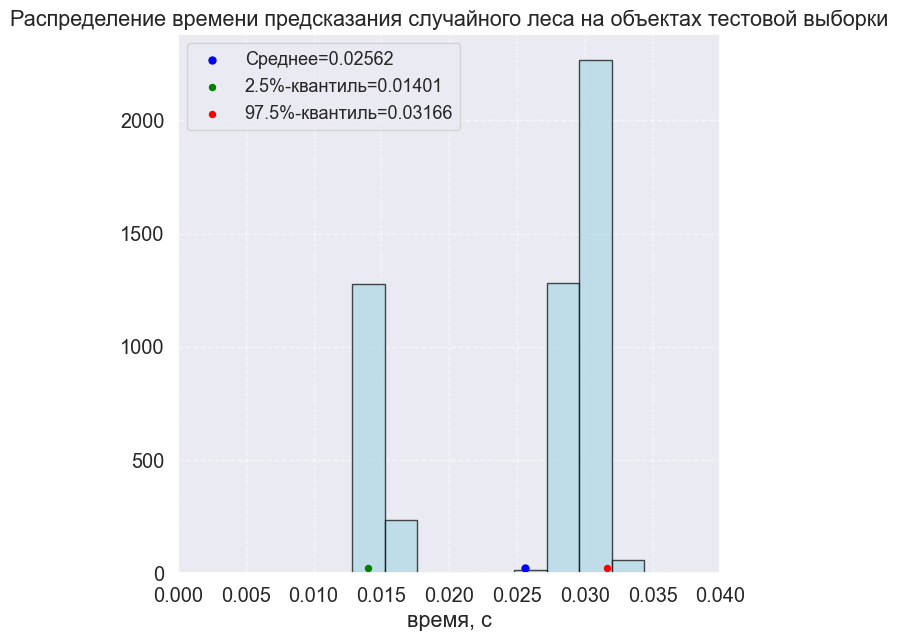

In [69]:
plt.figure(figsize=(7, 7))
plt.hist(rf_predict_times, bins=60, color='lightblue', edgecolor='black', alpha=0.7)

plt.scatter(mean, 25, marker='.', s=100, color='blue', label=f'Среднее={mean:.5f}')
plt.scatter(left, 25, marker='.', s=75, color='green', label=f'2.5%-квантиль={left:.5f}')
plt.scatter(right, 25, marker='.', s=75, color='red', label=f'97.5%-квантиль={right:.5f}')

plt.xlabel('время, с')
plt.xlim(0, 0.04)
plt.title('Распределение времени предсказания случайного леса на объектах тестовой выборки')
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Тут время намного больше, так как деревья глубже

In [70]:
gb_depths = []
gb_n_leaves = []

for est in gb.estimators_:
    gb_depths.append(est[0].get_depth())
    gb_n_leaves.append(est[0].get_n_leaves())

rf_depths = []
rf_n_leaves = []

for est in rf.estimators_:
    rf_depths.append(est.get_depth())
    rf_n_leaves.append(est.get_n_leaves())

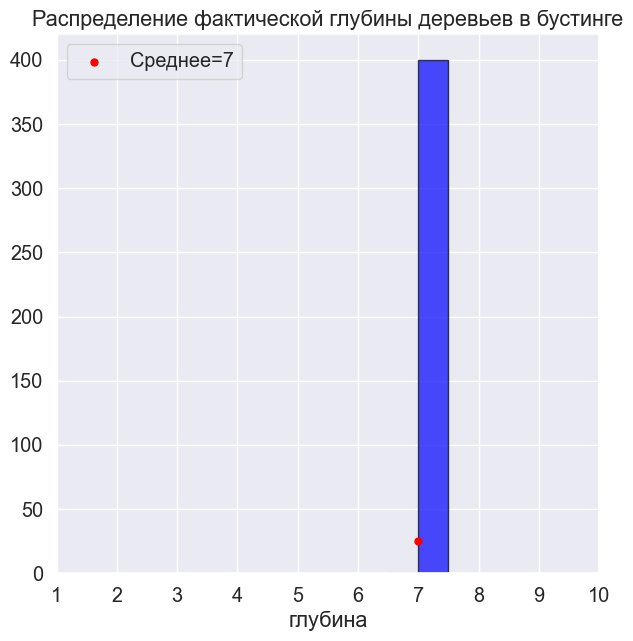

In [75]:
plt.figure(figsize=(7, 7))
plt.hist(gb_depths, bins=2, color='blue', edgecolor='black', alpha=0.7)

mean = np.array(gb_depths).mean()

plt.scatter(mean, 25, marker='.', s=100, color='red', label=f'Среднее={mean:.0f}')
plt.xlabel('глубина')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.legend()
plt.title('Распределение фактической глубины деревьев в бустинге')
plt.show()

Максимальная глубина 7, почти максимальная

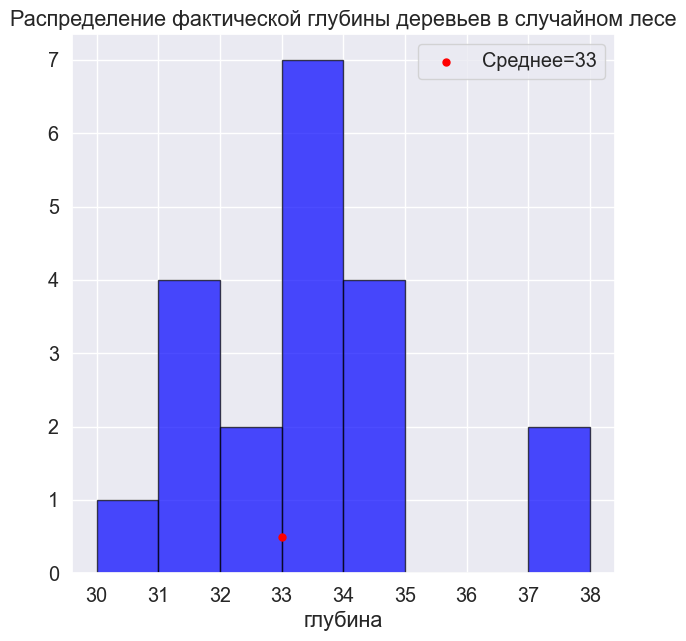

In [79]:
plt.figure(figsize=(7, 7))
plt.hist(rf_depths, bins=8, color='blue', edgecolor='black', alpha=0.7)
mean = np.array(rf_depths).mean()
plt.scatter(mean, 0.5, marker='.', s=100, color='red', label=f'Среднее={mean:.0f}')
plt.xlabel('глубина')
plt.legend()
plt.title('Распределение фактической глубины деревьев в случайном лесе')
plt.show()

Тут глубина намного больше

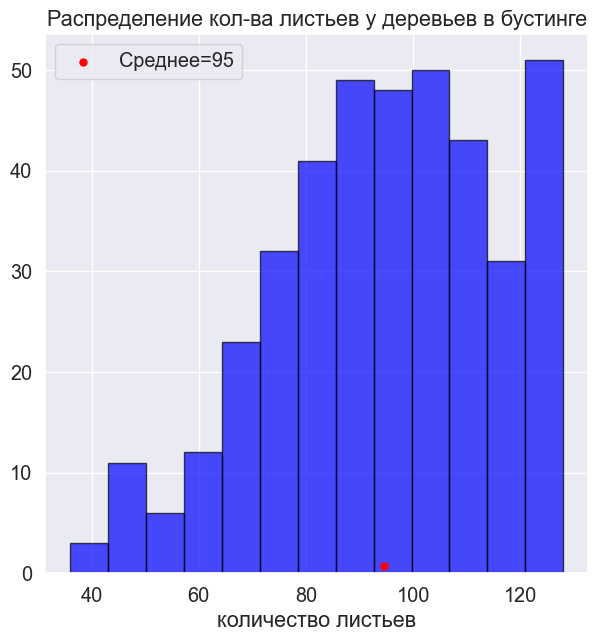

In [83]:
plt.figure(figsize=(7, 7))
plt.hist(gb_n_leaves, bins=13, color='blue', edgecolor='black', alpha=0.7)

mean = np.array(gb_n_leaves).mean()
plt.scatter(mean, 0.7, marker='.', s=100, color='red', label=f'Среднее={mean:.0f}')
plt.xlabel('количество листьев')
plt.legend()
plt.title('Распределение кол-ва листьев у деревьев в бустинге')
plt.show()

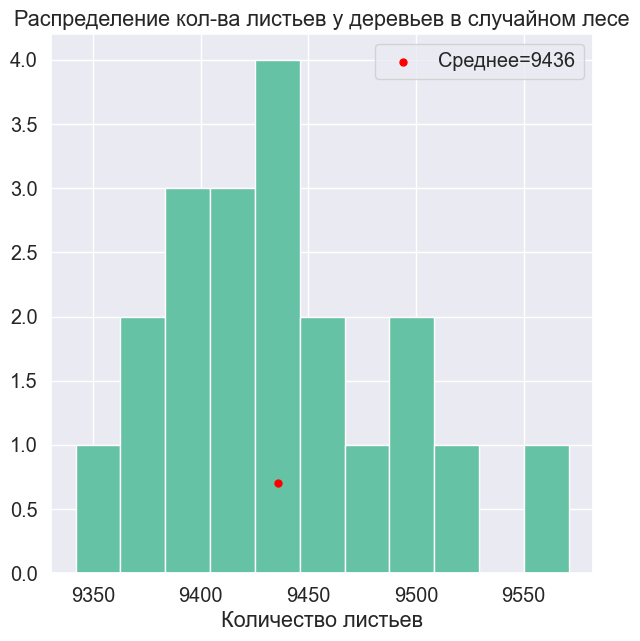

In [86]:
plt.figure(figsize=(7, 7))
plt.hist(rf_n_leaves, bins=11)
mean = np.array(rf_n_leaves).mean()
plt.scatter(mean, 0.7, marker='.', s=100, color='red', label=f'Среднее={mean:.0f}')
plt.xlabel('Количество листьев')
plt.legend()
plt.title('Распределение кол-ва листьев у деревьев в случайном лесе')
plt.show()

У деревьев в случайном лесе примерно в среднем в 100 раз больше листьев.

#### 3. 

Выберите самый значимый признак согласно `feature_importances_`. Визуализируйте работу бустинга, обученного только на одном этом признаке.

Для этого рассмотрите процесс построения бустинга для первых 10 итераций. При визуализации требуется для каждой итерации нарисовать:
* предсказания новой базовой модели и выборку, на которой эта базовая модель обучается;
* предсказания текущей композиции и исходную обучающую выборку. 

Пример графиков смотрите в лекции в разделе бустинг в задаче регресии.

In [87]:
best_feature = gb.feature_importances_.argmax()
best_feature

0

In [96]:
gb_one = GradientBoostingRegressor(n_estimators=optimal_n_estimators,
                                   max_depth=optimal_max_depth,
                                   learning_rate=optimal_learning_rate)
X_train_one = X_train[:, best_feature][:, None]
gb_one.fit(X_train_one, y_train)

GradientBoostingRegressor(learning_rate=0.04413793103448276, max_depth=7,
                          n_estimators=400)

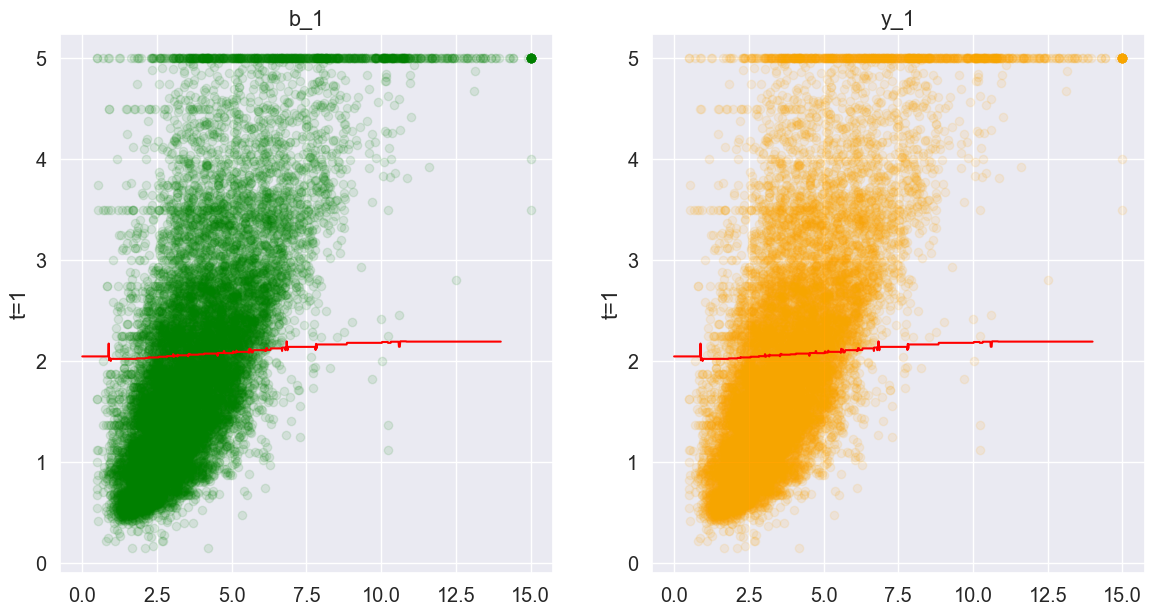

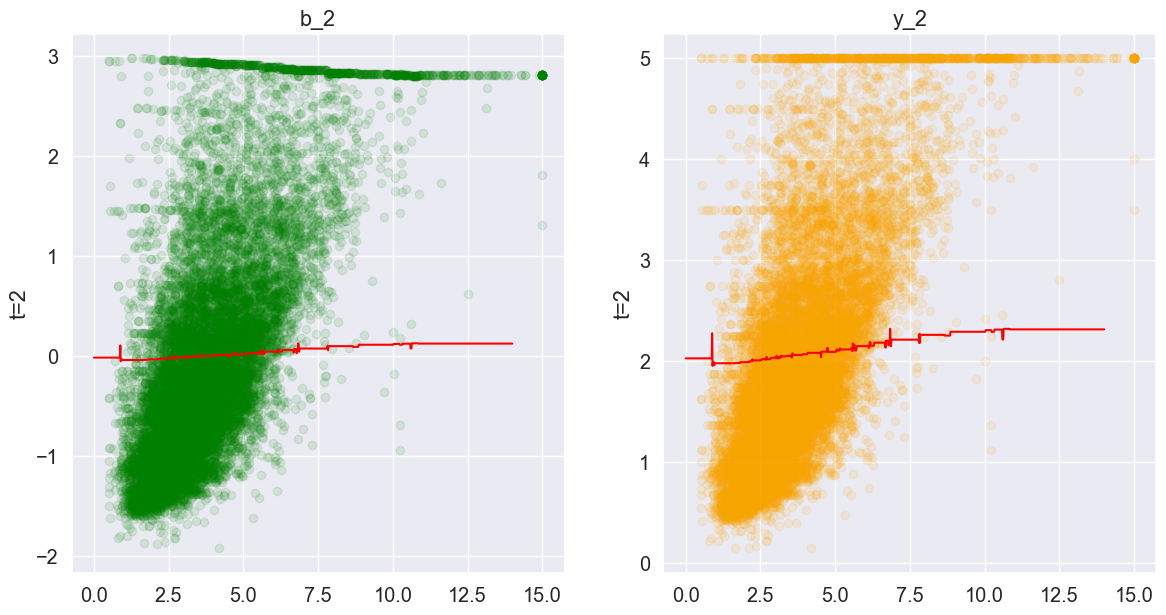

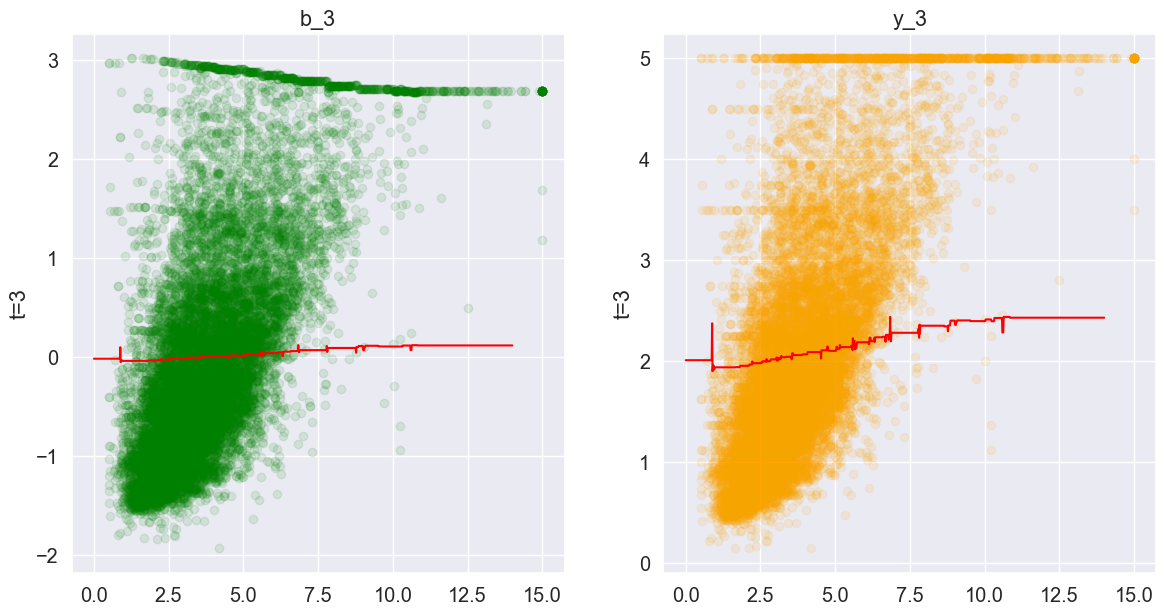

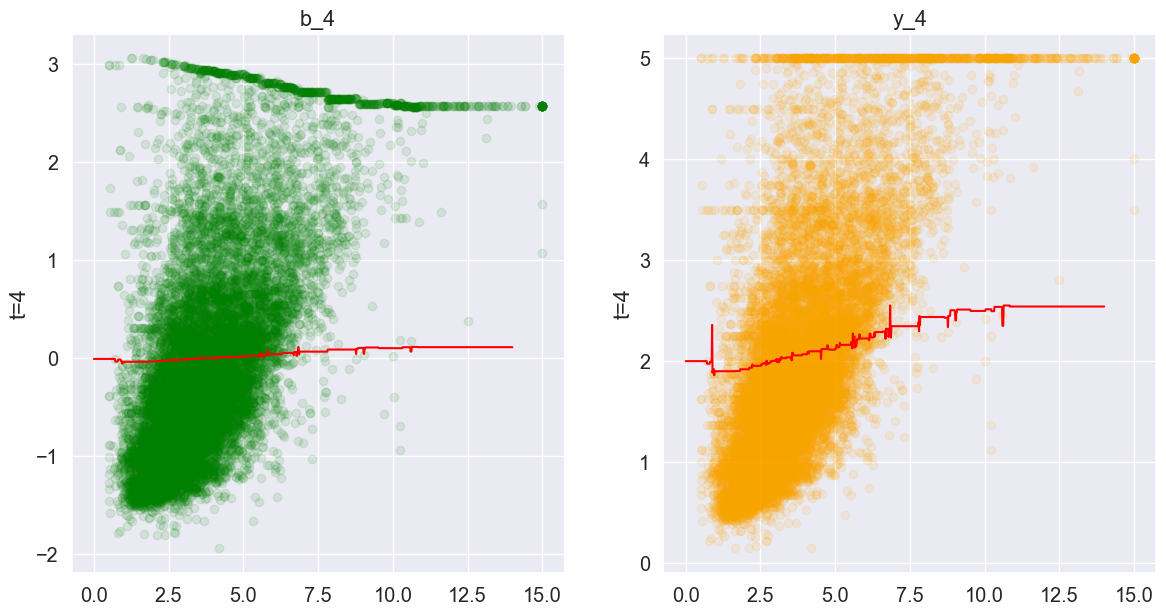

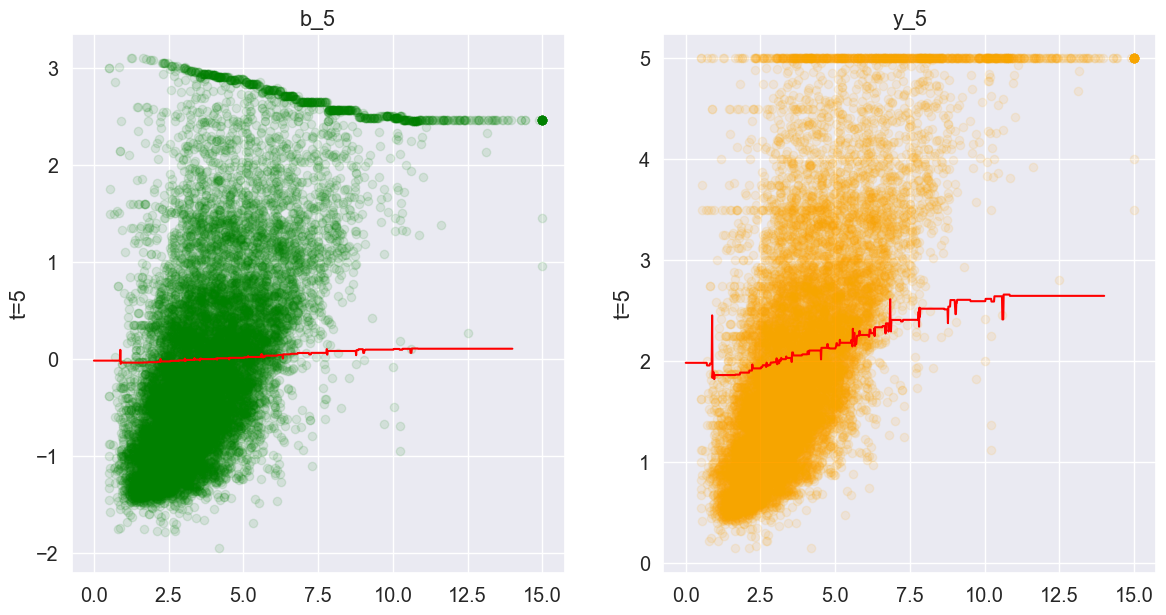

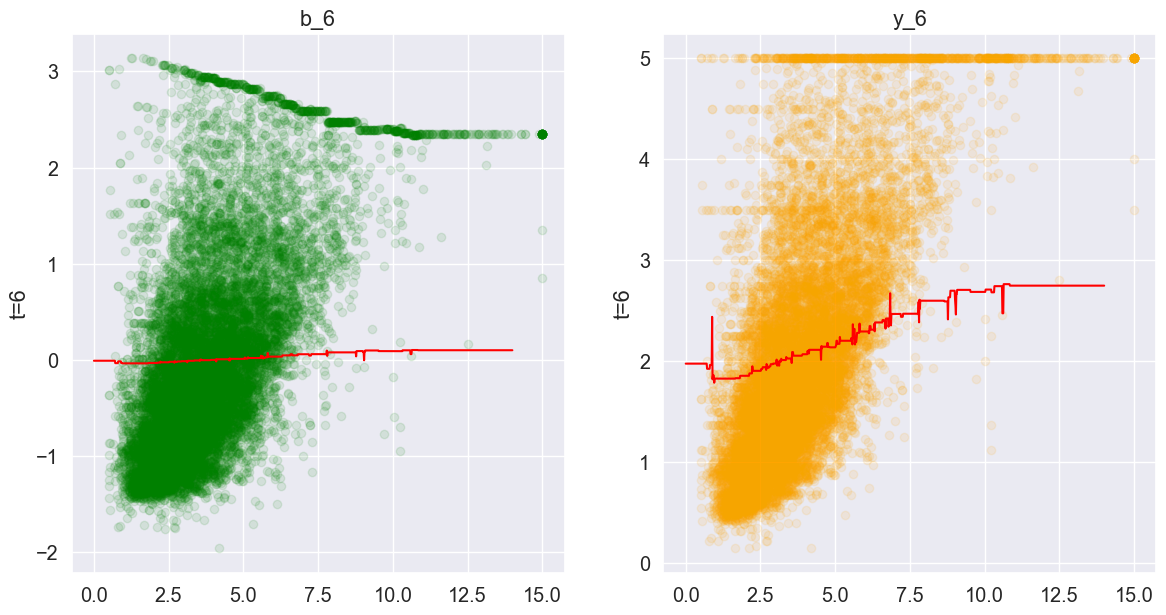

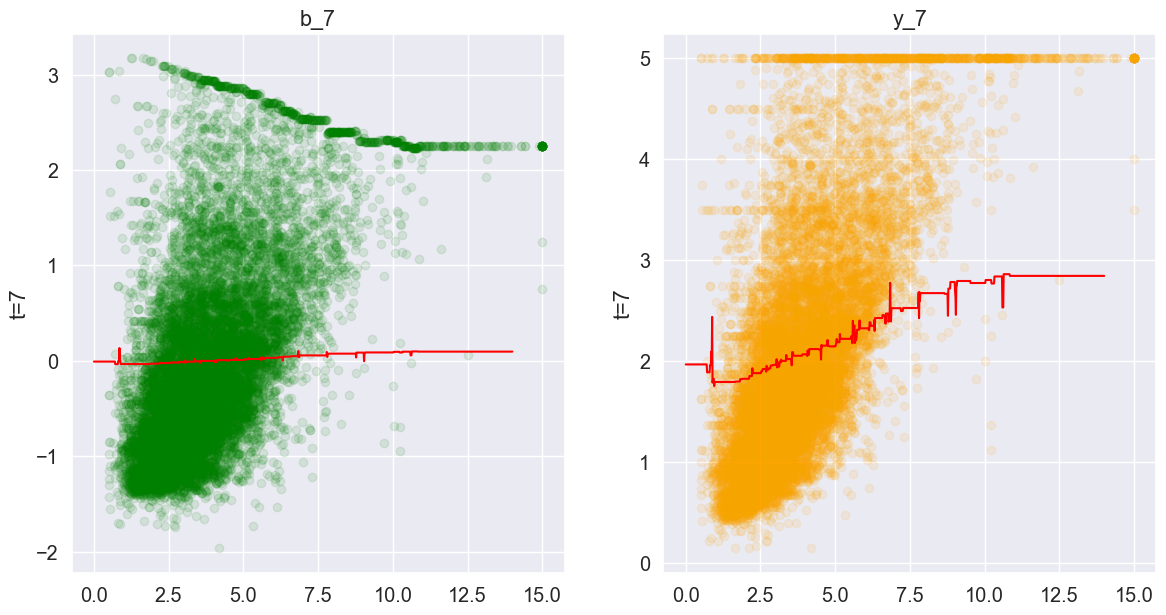

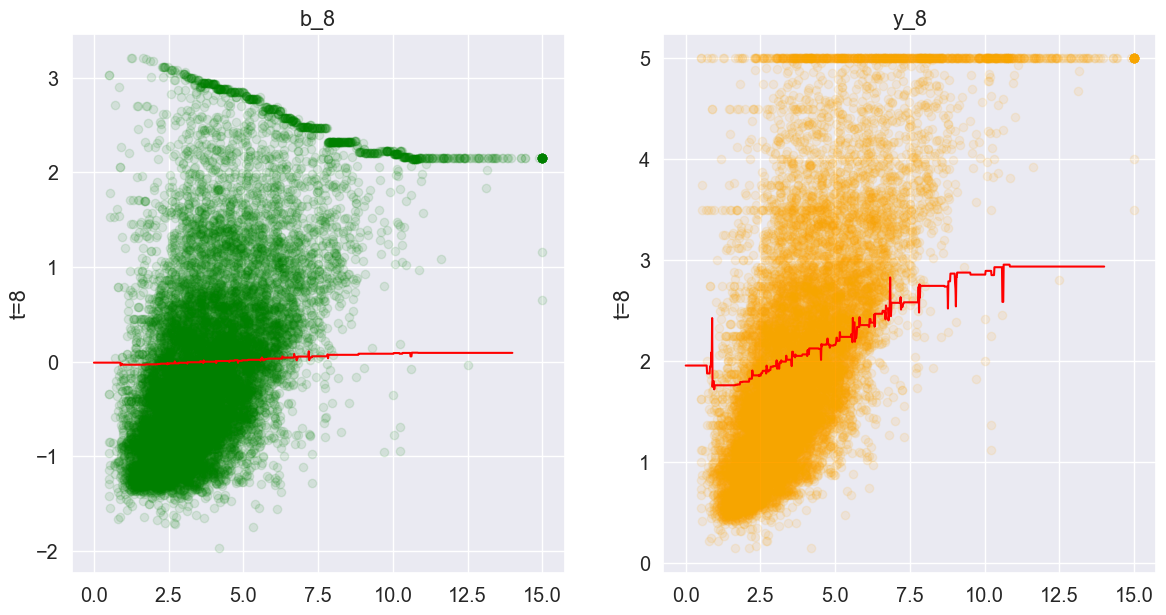

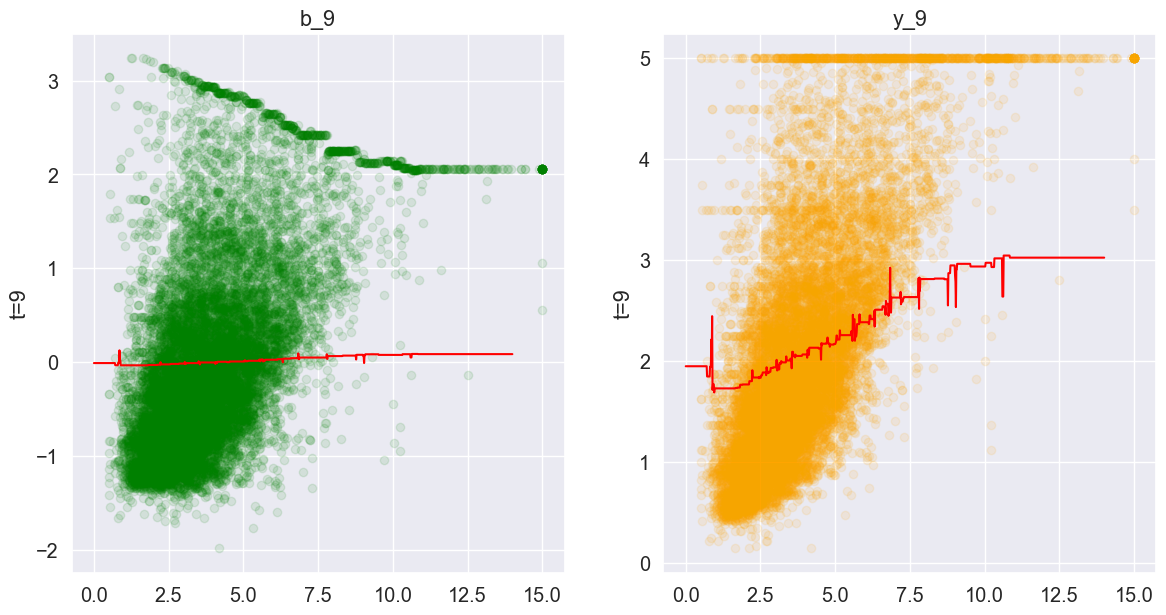

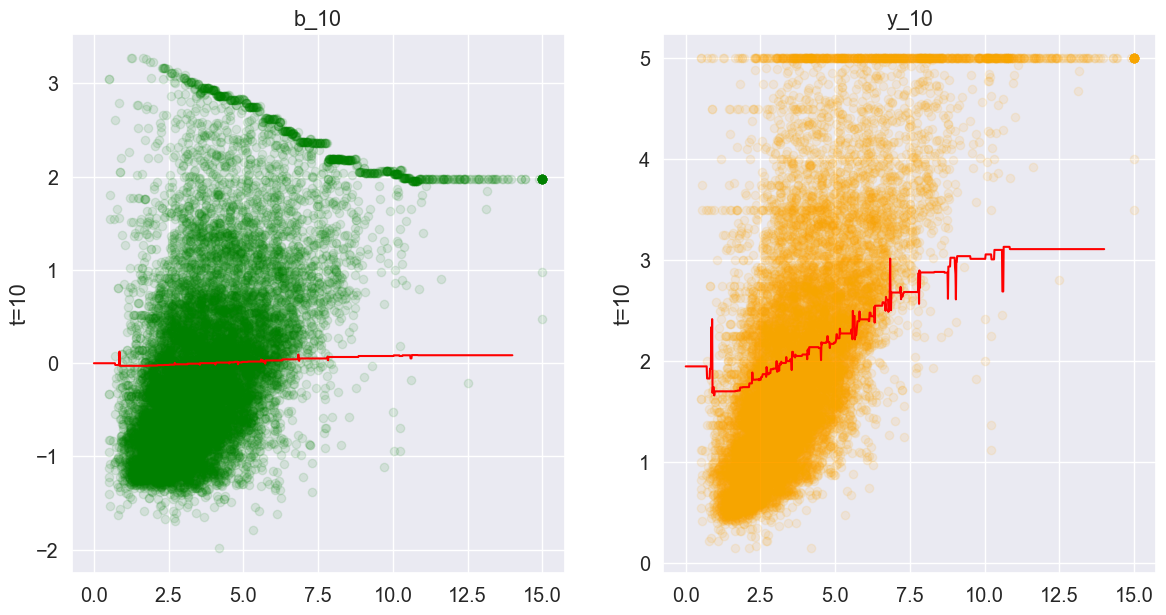

In [97]:
preds = np.array([x for x in gb_one.staged_predict(np.linspace(0, 14, 1000)[:, None])])
preds_one = np.array([x for x in gb_one.staged_predict(X_train_one)])

predsm1 = np.zeros_like(preds)
predsm1[1:] += preds[:-1]
preds_self = preds - predsm1

tmp = np.zeros_like(preds_one)
tmp[1:] += preds_one[:-1]
preds_one = tmp

for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
    ax[0].scatter(X_train_one, y_train-preds_one[i], alpha=0.1, color='green')
    ax[0].plot(np.linspace(0, 14, 1000), preds_self[i], color='red')
    ax[0].set_ylabel(f't={i+1}')
    ax[0].set_title(f'b_{i+1}')
    ax[1].scatter(X_train_one, y_train, alpha=0.1, color='orange')
    ax[1].plot(np.linspace(0, 14, 1000), preds[i], color='red')
    ax[1].set_ylabel(f't={i+1}')
    ax[1].set_title(f'y_{i+1}')

Видим, что по первому признаку модель хорошо описывает зависимость

Как получается выборка, на которой обучается новая базовая модель в данном случае и в общем случае? 

Это отступ текущей обученной композиции от таргета

#### 4.

Параметр `init` у класса `GradientBoostingRegressor` задает модель, выполняющую начальные предсказания, с которых стартует построение ансамбля. Какая начальная модель используется по умолчанию?

In [90]:
dr = gb.init_
dr.fit(X_train, y_train)
pred = dr.predict(X_test)
pred

array([2.06917483, 2.06917483, 2.06917483, ..., 2.06917483, 2.06917483,
       2.06917483])

Видим, что это константа.

In [94]:
y_train.mean()

2.069174828165375

GradientBoostingRegressor начнет с предсказания среднего значения целевой переменной

Обучите градиентный бустинг на решающих деревьях, у которого в качестве инициализирующей модели используется линейная регрессия. Для этого в качестве параметра `init` передайте модель ридж-регрессии `Ridge`, которая должна быть инициализирована, но необучена. 

Подберите оптимальные гиперпараметры такой композиции. Как вы будете подбирать гиперпараметр ридж-регрессии? Улучшилось ли качество модели на тестовой выборке?

*Замечания.* 

1. Для настройки `alpha` в `Ridge`-модели внутри `GradientBoostingRegressor` вам может помочь метод `get_params()` у бустинга.
2. Не забывайте, что у бустинга тоже есть параметр `alpha`, не перепутайте их.

In [95]:
GradientBoostingRegressor(init=Ridge()).get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init__alpha': 1.0,
 'init__copy_X': True,
 'init__fit_intercept': True,
 'init__max_iter': None,
 'init__positive': False,
 'init__random_state': None,
 'init__solver': 'auto',
 'init__tol': 0.0001,
 'init': Ridge(),
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [98]:
gbr_gs = GridSearchCV(
    estimator=GradientBoostingRegressor(init=Ridge()),
    param_grid= {
        'max_depth': [4, 6, 8],
        'n_estimators': [150, 200],
        'learning_rate': [0.1, 0.2],
        'init__alpha': [0, 0.33, 0.66, 1]
    },
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
)

gbr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\rusin\Desktop\физкек\ФПМИ\ДС-поток\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.80108e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(estimator=GradientBoostingRegressor(init=Ridge()), n_jobs=-1,
             param_grid={'init__alpha': [0, 0.33, 0.66, 1],
                         'learning_rate': [0.1, 0.2], 'max_depth': [4, 6, 8],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [99]:
gbr_gs.best_params_

{'init__alpha': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

In [100]:
gbr = GradientBoostingRegressor(init=Ridge(alpha=0), learning_rate=0.1, max_depth=8, n_estimators=200)
gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)
mean_squared_error(y_test, pred)

c:\Users\rusin\Desktop\физкек\ФПМИ\ДС-поток\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.7973e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.2087303693107232

#### 5. 

Рассмотрим модели смеси градиентного бустинга $\widehat{y}_{gb}$ и случайного леса $\widehat{y}_{rf}$ с оптимальными гиперпараметрами, подобранными ранее, в виде
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
где $w \in [0, 1]$ &mdash; коэффициент усреднения. Подберите оптимальное значение гиперпараметра $w$ и выведите его. Удалось ли добиться улучшения качества на тестовой выборке?

**6.**

Сделайте итоговые выводы.

1. Случайный лес строит много глубоких деревьев, уменьшая переобучение за счет усреднения.
2. Градиентный бустинг добавляет неглубокие деревья последовательно, чтобы исправлять ошибки предыдущих.
3. В случайном лесе основной параметр — количество деревьев, в бустинге — скорость обучения, количество и глубина деревьев, начальная модель.
4. Случайный лес обучается быстрее, но медленнее на предсказаниях; бустинг — наоборот.